In [1]:
import initial_conditions as ic
from amuse.units import units
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bodies = ic.generate_initial_conditions(1|units.Msun,
                               1|units.MJupiter,
                               1|units.AU,
                               0.015|units.MEarth,
                               save_path=None)

In [3]:
bodies = ic.add_encounter(bodies, 1|units.Msun, 1|units.AU, 10|units.kms, 0,0,0)
# bodies = ic.add_encounter(bodies, 1|units.Msun, 0|units.AU, 10|units.kms, 0,0,90)

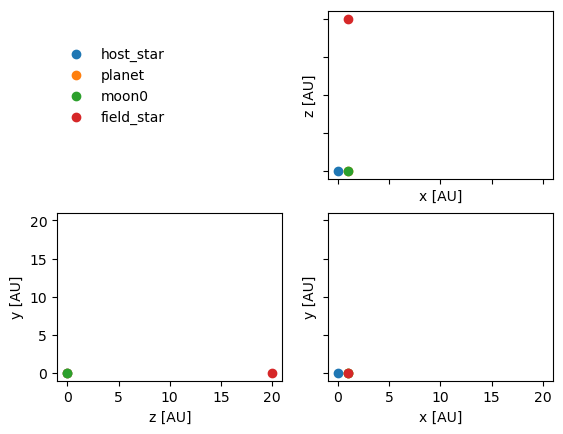

In [4]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True,sharey=True)
ax1.remove()
for body in bodies:
    # print(body)
    ax4.scatter(body.x.value_in(units.AU), body.y.value_in(units.AU), label=body.name)
    ax2.scatter(body.x.value_in(units.AU), body.z.value_in(units.AU))
    ax3.scatter(body.z.value_in(units.AU), body.y.value_in(units.AU))
# ax1.scatter(bodies.x.value_in(units.AU), bodies.y.value_in(units.AU))
# ax1.set_aspect('equal')
ax4.set_xlabel('x [AU]')
ax4.set_ylabel('y [AU]')

ax3.set_xlabel('z [AU]')
ax3.set_ylabel('y [AU]')

# ax2.scatter(bodies.x.value_in(units.AU), bodies.z.value_in(units.AU))
# ax2.set_aspect('equal')
ax2.set_xlabel('x [AU]')
ax2.set_ylabel('z [AU]')
fig.legend(loc=(0.1,0.7), frameon=False)
plt.show()

3467.23961347 day


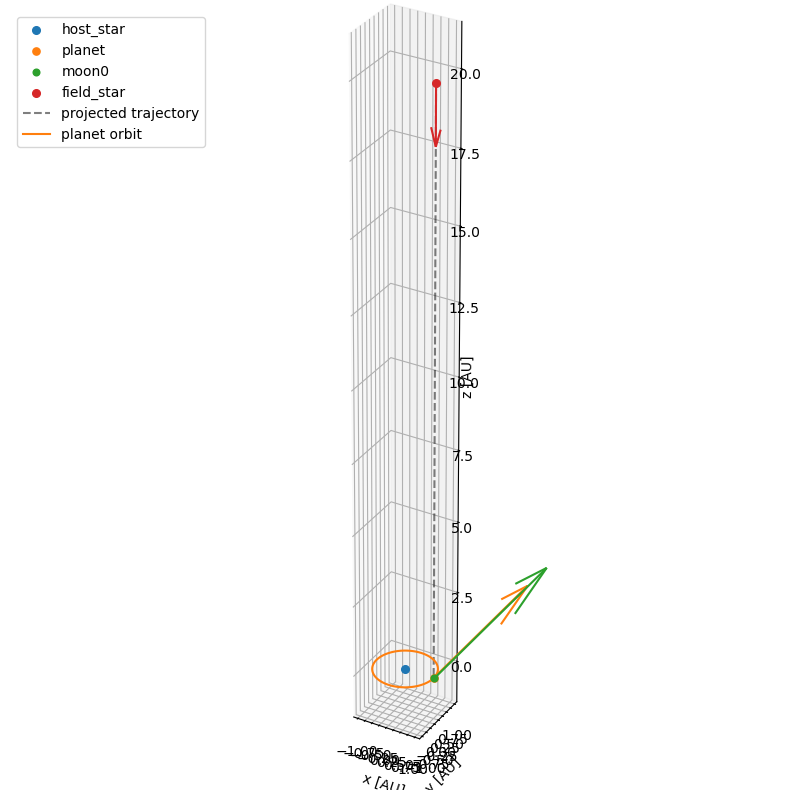

In [5]:
# make 3d plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for body in bodies:
    ax.scatter(body.x.value_in(units.AU), body.y.value_in(units.AU), body.z.value_in(units.AU),
                label=body.name, s=np.log10(body.mass.value_in(units.kg)))

#plot the veloctity vectors
for body in bodies:
    ax.quiver(body.x.value_in(units.AU), body.y.value_in(units.AU), body.z.value_in(units.AU),
              body.vx.value_in(units.kms)/5, body.vy.value_in(units.kms)/5, body.vz.value_in(units.kms)/5,
              color=ax._get_lines.get_next_color())
    
#find the encounter time
t_encounter = (bodies[0].position - bodies[3].position).length() / bodies[3].velocity.length()
print(t_encounter.in_(units.day))
    
#plot a line for the projected trajectory of bodies[3] until the encounter
ax.plot([bodies[3].x.value_in(units.AU), bodies[3].x.value_in(units.AU) + bodies[3].vx.value_in(units.AU/units.day)*t_encounter.value_in(units.day)],
        [bodies[3].y.value_in(units.AU), bodies[3].y.value_in(units.AU) + bodies[3].vy.value_in(units.AU/units.day)*t_encounter.value_in(units.day)],
        [bodies[3].z.value_in(units.AU), bodies[3].z.value_in(units.AU) + bodies[3].vz.value_in(units.AU/units.day)*t_encounter.value_in(units.day)],
        alpha=0.5, c='k', ls='--', label='projected trajectory')

#plot a ring of radius 1 AU around bodies[0]
theta = np.linspace(0,2*np.pi,100)
x = np.cos(theta)
y = np.sin(theta)
z = np.zeros_like(x)
ax.plot(x,y,z, c='tab:orange', label='planet orbit')

ax.set_aspect('equal')


ax.legend(loc='upper left')
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.set_zlabel('z [AU]')
plt.show()

In [6]:
from run_simulation import run_simulation

bodies, errors = run_simulation(bodies, plot=False)

100%|██████████| 100/100 [00:17<00:00,  5.66it/s]


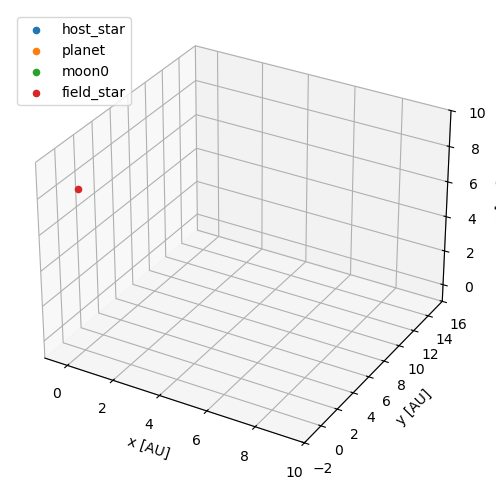

In [7]:
#3d plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
for body in bodies:
    ax.scatter(body.x.value_in(units.AU), body.y.value_in(units.AU), body.z.value_in(units.AU),
            label=body.name)
    # ax.quiver(body.x.value_in(units.AU), body.y.value_in(units.AU), body.z.value_in(units.AU),
    #             body.vx.value_in(units.kms)/10, body.vy.value_in(units.kms)/10, body.vz.value_in(units.kms)/10,
    #             color=ax._get_lines.get_next_color())
ax.legend(loc='upper left')
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.set_zlabel('z [AU]')

ax.set_xlim(-1,10)
ax.set_ylim(-2,16)
ax.set_zlim(-1,10)

plt.show()
    

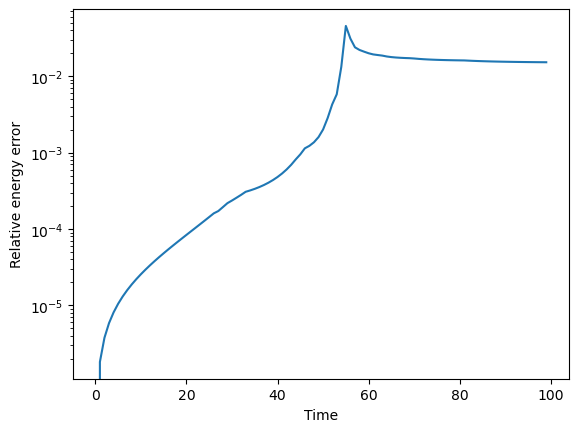

In [8]:
plt.figure()
plt.plot(errors)
plt.yscale('log')
plt.ylabel('Relative energy error')
plt.xlabel('Time')
plt.show()